# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Loading The Data

In [3]:
data= pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.shape

(398, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [7]:
data['car name'].value_counts()

ford pinto                   6
ford maverick                5
toyota corolla               5
amc matador                  5
amc hornet                   4
                            ..
amc ambassador brougham      1
pontiac catalina brougham    1
volkswagen scirocco          1
chevrolet monte carlo s      1
oldsmobile starfire sx       1
Name: car name, Length: 305, dtype: int64

In [8]:
data.drop('car name',axis=1,inplace=True)

In [9]:
# summary Stats of Dataset
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Data PreProcessing

In [10]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [11]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
data=data[data['horsepower']!='?']

# Correlation Matrix

In [13]:
data.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


In [14]:
data.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

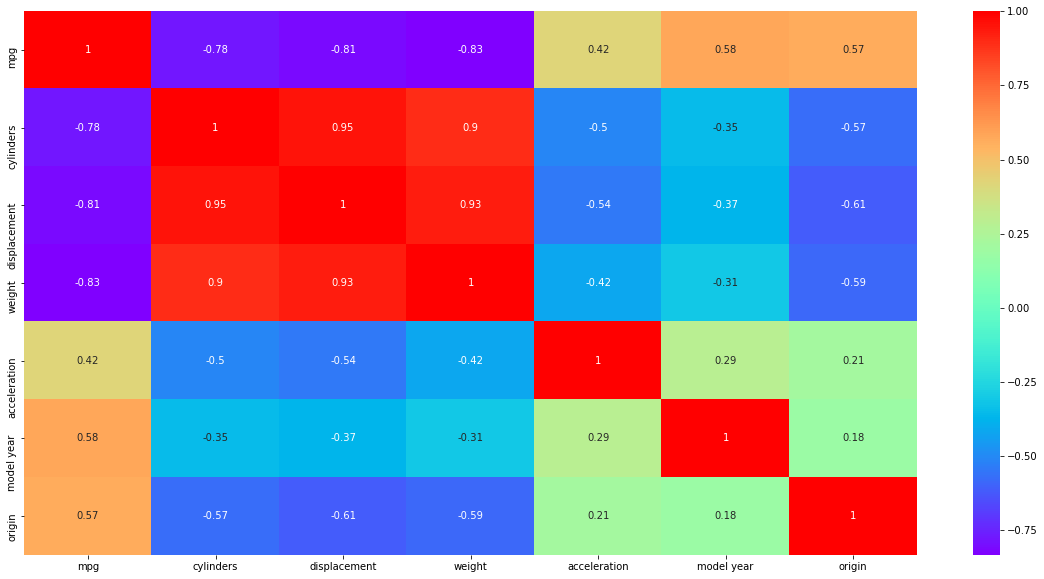

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap='rainbow',annot=True);

# univariate analysis

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


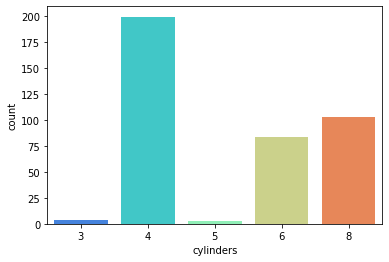

In [16]:
sns.countplot(data.cylinders, data=data, palette='rainbow');

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


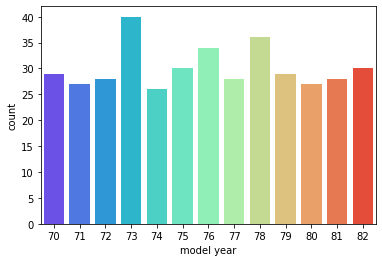

In [17]:
sns.countplot(data['model year'], palette='rainbow');

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


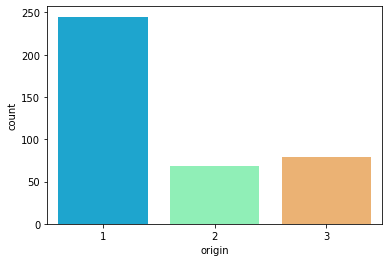

In [18]:
sns.countplot(data.origin, palette='rainbow');

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


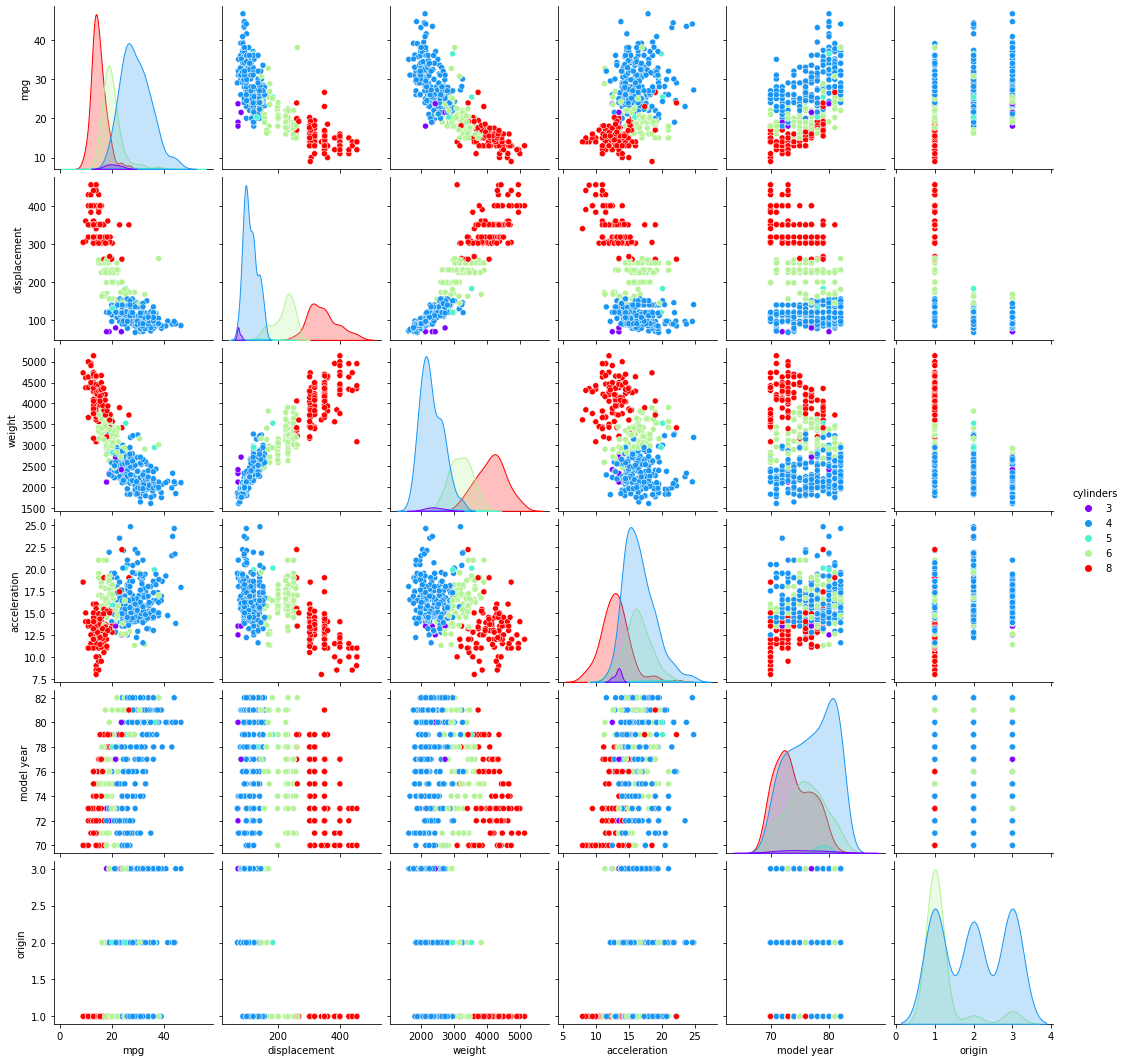

In [19]:
sns.pairplot(data,palette='rainbow',hue='cylinders');

In [20]:
# MultiVariate

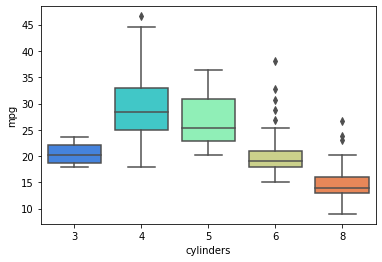

In [21]:
sns.boxplot(x=data['cylinders'],y=data['mpg'],palette='rainbow');

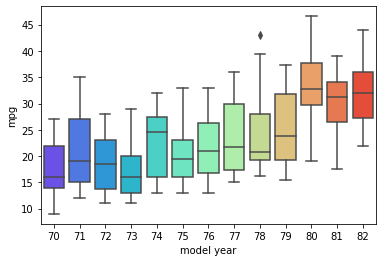

In [22]:
sns.boxplot(y='mpg', x='model year', data=data, palette='rainbow');

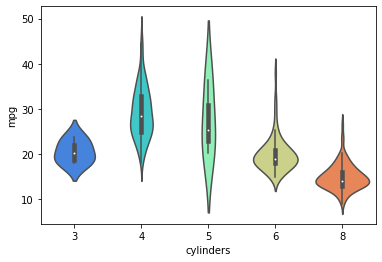

In [23]:
sns.violinplot(x=data['cylinders'],y=data['mpg'],palette='rainbow');

In [24]:
# Modlling dataset 

In [25]:
X=data.drop('mpg',axis=1)
y=data['mpg']

In [26]:
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
scaler= MinMaxScaler()

In [28]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [29]:
model= {'Linear Regression': LinearRegression(),
       'tree': DecisionTreeRegressor(),
       'Random forest': RandomForestRegressor(),
       'Adaboost': AdaBoostRegressor(),
       'Xgboost': XGBRegressor(),
       'XgRandomF': XGBRFRegressor()}

In [30]:
train_score={}
test_score={}

for name,model in model.items():
    model.fit(X_train,y_train)
    train_score[name]= model.score(X_train,y_train)
    test_score[name]= model.score(X_test,y_test)

In [31]:
score= pd.DataFrame(train_score,index=['Train_accuracy'])
score=score.T

In [32]:
score['Test_score']=test_score.values()

In [33]:
score

,Train_accuracy,Test_score
Linear Regression,0.816506,0.836366
tree,1.000000,0.743083
Random forest,0.978093,0.910316
Adaboost,0.906620,0.872208
Xgboost,0.999987,0.885256
XgRandomF,0.966109,0.898627


In [34]:
score['Difference']= score['Train_accuracy']-score['Test_score']

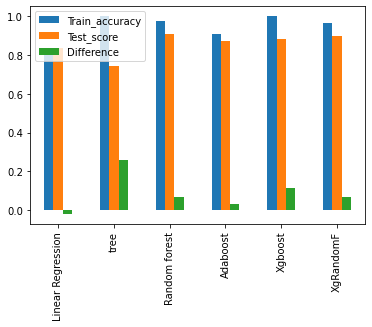

In [35]:
score.plot.bar();

# Polynomial Feature

In [36]:
poly_feat= PolynomialFeatures(degree=2)
poly_feat_X= poly_feat.fit_transform(X)

In [37]:
X_train,X_test,y_train,y_test= train_test_split(poly_feat_X,y,test_size=0.2,random_state=0)

In [38]:
model= {'Linear Regression': LinearRegression(),
       'tree': DecisionTreeRegressor(),
       'Random forest': RandomForestRegressor(),
       'Adaboost': AdaBoostRegressor(),
       'Xgboost': XGBRegressor(),
       'XgRandomF': XGBRFRegressor()}
train_score={}
test_score={}

for name,model in model.items():
    model.fit(X_train,y_train)
    train_score[name]= model.score(X_train,y_train)
    test_score[name]= model.score(X_test,y_test)

In [39]:
score= pd.DataFrame(train_score,index=['Train_accuracy'])
score=score.T

In [40]:
score['Test_score']=test_score.values()
score['Difference']= score['Train_accuracy']-score['Test_score']
score

,Train_accuracy,Test_score,Difference
Linear Regression,0.894047,0.890179,0.003868
tree,1.000000,0.763567,0.236433
Random forest,0.980289,0.899120,0.081169
Adaboost,0.923301,0.883841,0.039460
Xgboost,0.999999,0.904888,0.095111
XgRandomF,0.973339,0.900062,0.073278


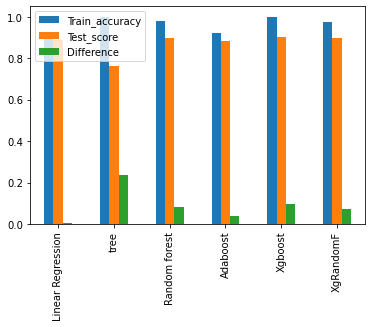

In [41]:
score.plot.bar();

In [42]:
lr= LinearRegression().fit(X_train,y_train)

In [43]:
y_pred= lr.predict(X_test)

In [44]:
result= pd.DataFrame()
result['Y_prediction']=y_pred
result['Y_true']=y_test.values
result['difference']= result['Y_true']-result['Y_prediction']
result

,Y_prediction,Y_true,difference
0,29.736472,28.0,-1.736472
1,23.938857,22.3,-1.638857
2,12.937303,12.0,-0.937303
3,36.356063,38.0,1.643937
4,35.103565,33.8,-1.303565
...,...,...,...
74,19.819094,23.0,3.180906
75,13.602359,14.0,0.397641
76,25.248142,26.0,0.751858
77,17.468158,19.2,1.731842


In [45]:
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mse)
print('\n')
print('Mean Squared error :',mae)

Mean Absolute Error: 6.825965811915082


Mean Squared error : 1.8391367037697297
